In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

import warnings
import tqdm
from tqdm import tqdm
warnings.filterwarnings("ignore")

# DATA

In [2]:
DATA_PATH = 'data/'

In [3]:
new_index_row = ['id','time','op_setting_1','op_setting_2','op_setting_3',
                 'sensor_1','sensor_2','sensor_3','sensor_4','sensor_5',
                 'sensor_6','sensor_7','sensor_8','sensor_9','sensor_10',
                 'sensor_11','sensor_12','sensor_13','sensor_14','sensor_15',
                 'sensor_16','sensor_17','sensor_18','sensor_19','sensor_20',
                 'sensor_21','sensor_22','sensor_23']

In [4]:
train_df = pd.read_csv(DATA_PATH + 'train_FD002.txt', names = new_index_row,sep=' ')
test_df = pd.read_csv(DATA_PATH + 'test_FD002.txt',names = new_index_row,sep=' ')

In [5]:
train_df = train_df.iloc[:,:-2]
test_df = test_df.iloc[:,:-2]

## 6 tpye of setting

In [8]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto")
op_setting_df = train_df.iloc[:,2:5]
kmeans.fit(op_setting_df)
kmeans.cluster_centers_

array([[4.20029763e+01, 8.40485184e-01, 1.00000000e+02],
       [1.00029713e+01, 2.50495035e-01, 1.00000000e+02],
       [2.50030380e+01, 6.20501875e-01, 6.00000000e+01],
       [1.50451268e-03, 4.94343610e-04, 1.00000000e+02],
       [3.50030490e+01, 8.40500585e-01, 1.00000000e+02],
       [2.00029990e+01, 7.00515193e-01, 1.00000000e+02]])

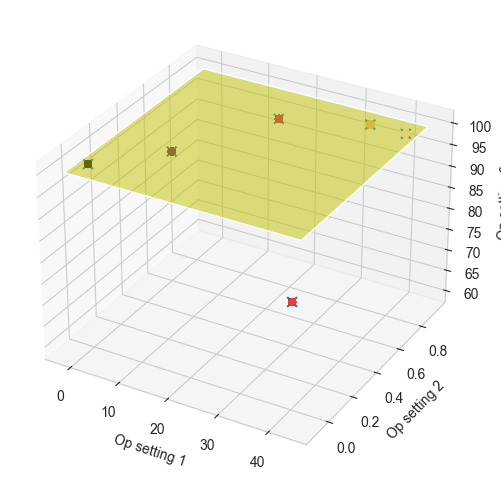

In [9]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,10))

# ax = Axes3D(fig) # Method 1
ax = fig.add_subplot(111, projection='3d') # Method 2

x = train_df['op_setting_1']
y = train_df['op_setting_2']
z = train_df['op_setting_3']
centroids = kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids_z = centroids[:,2]

X, Y = np.meshgrid(np.linspace(x.min()-2, x.max()+2, 10), np.linspace(y.min()-0.1, y.max()+0.1, 10))
Z = np.full_like(X, 100)

# Vẽ mặt phẳng
ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100, color='yellow')

ax.scatter(centroids_x, centroids_y, centroids_z, marker='x',s=50,alpha=1)
ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel('Op setting 1')
ax.set_ylabel('Op setting 2')
ax.set_zlabel('Op setting 3')

plt.show();

In [11]:
train_df['Cluster_setting'] = kmeans.fit_predict(train_df)

,id,time,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,Cluster_setting
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,0
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,0
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,2
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,0
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189,1
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454,1
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503,2
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729,2


In [97]:
train_setting = []
for i in range(6):
    train_setting_i = train_df[train_df['Cluster_setting']==i]
    train_setting.append(train_setting_i)

In [13]:
train_setting[0]

,id,time,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,Cluster_setting
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2387.72,8048.56,9.3461,0.02,334,2223,100.0,14.73,8.8071,0
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2387.66,8072.30,9.3774,0.02,330,2212,100.0,10.41,6.2665,0
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2387.61,8068.66,9.3528,0.02,329,2212,100.0,10.59,6.4701,0
6,1,7,42.0043,0.8409,100.0,445.00,549.74,1347.45,1127.19,3.91,...,2387.69,8075.54,9.3753,0.02,330,2212,100.0,10.62,6.4227,0
8,1,9,41.9995,0.8407,100.0,445.00,549.33,1348.23,1127.45,3.91,...,2387.62,8065.78,9.3878,0.02,331,2212,100.0,10.69,6.3802,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53530,260,88,35.0063,0.8400,100.0,449.44,555.36,1359.51,1126.50,5.48,...,2388.03,8068.75,9.2611,0.02,333,2223,100.0,15.00,8.9687,0
53531,260,89,34.9980,0.8400,100.0,449.44,555.89,1362.26,1125.76,5.48,...,2388.00,8064.18,9.3115,0.02,331,2223,100.0,14.99,8.8945,0
53533,260,91,42.0066,0.8417,100.0,445.00,549.31,1349.19,1122.18,3.91,...,2387.97,8078.61,9.3434,0.02,330,2212,100.0,10.75,6.4097,0
53534,260,92,42.0004,0.8400,100.0,445.00,549.51,1349.59,1115.64,3.91,...,2387.98,8082.15,9.3519,0.02,330,2212,100.0,10.64,6.4418,0


## Normalize by type of setting

In [98]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

In [159]:
train_setting_robust_scaled = []
for setting_df in train_setting:
    robust_scaler.fit(setting_df.iloc[:,5:-1])
    df = pd.DataFrame(setting_df)
    sensor_columns = [col for col in df.columns if col.startswith('sensor')]
    df[sensor_columns] = robust_scaler.fit_transform(df[sensor_columns])
    train_setting_robust_scaled.append(df)

In [160]:
train_setting_minmax_scaled = []
for setting_df in train_setting:
    df = pd.DataFrame(setting_df)
    sensor_columns = [col for col in df.columns if col.startswith('sensor')]
    df[sensor_columns] = minmax_scaler.fit_transform(df[sensor_columns])
    train_setting_minmax_scaled.append(df)

In [162]:
train_setting_minmax_scaled_df = pd.concat(train_setting_minmax_scaled, ignore_index=True)
train_setting_robust_scaled_df = pd.concat(train_setting_robust_scaled, ignore_index=True)

## Show

### Table 0

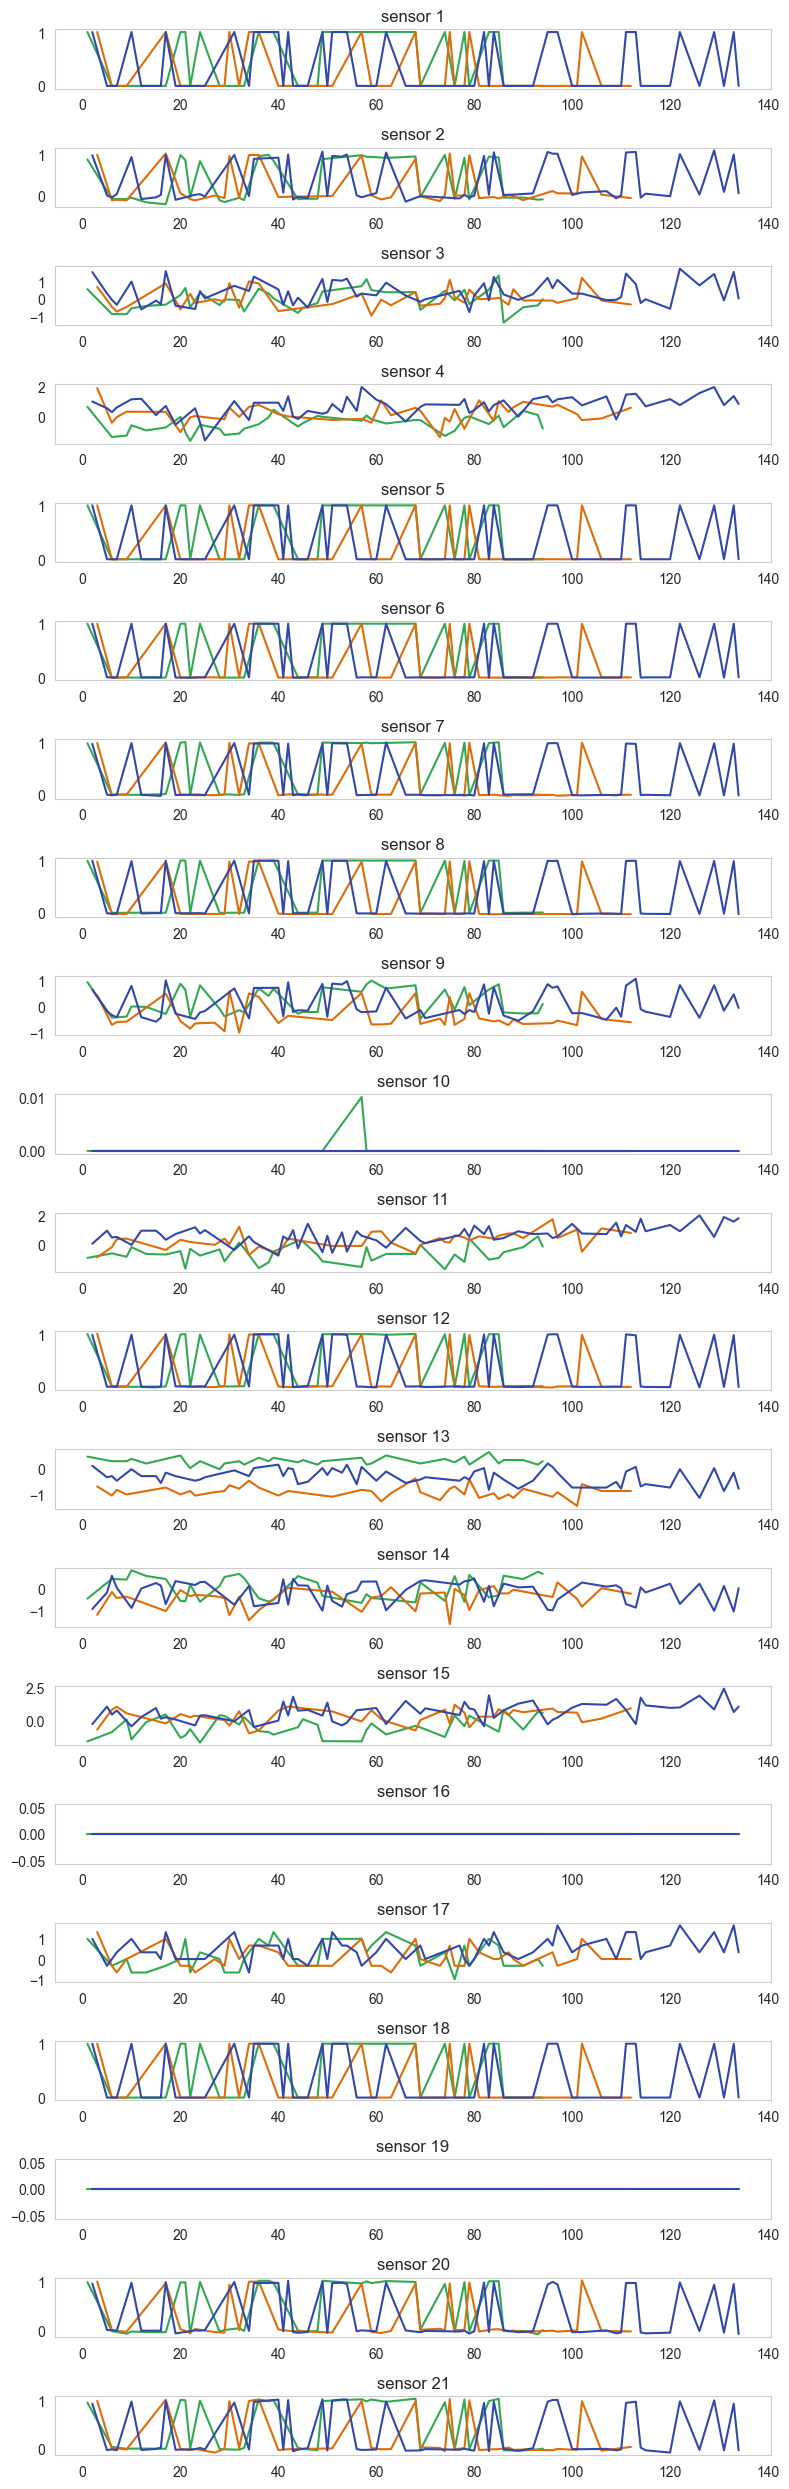

In [24]:
df = train_setting[0]
fig,axs = plt.subplots(nrows=21,ncols=1,figsize=(8,25))
random_id = np.random.randint(1,260,3)
df_id = df[df['id'].isin(random_id)]
colors = ['#32a852','#de6c09','#3248a8']
for i in range(21):
    for j,id_ in enumerate(random_id):
        color = colors[j % 3]
        df_sensor = df_id[df_id['id']==id_].iloc[:,[1,i+5]]
        df_sensor.set_index('time',inplace=True)
        axs[i].plot(df_sensor,color=color)
    axs[i].set_title(f'sensor {i+1}')
plt.tight_layout()


### Table 1

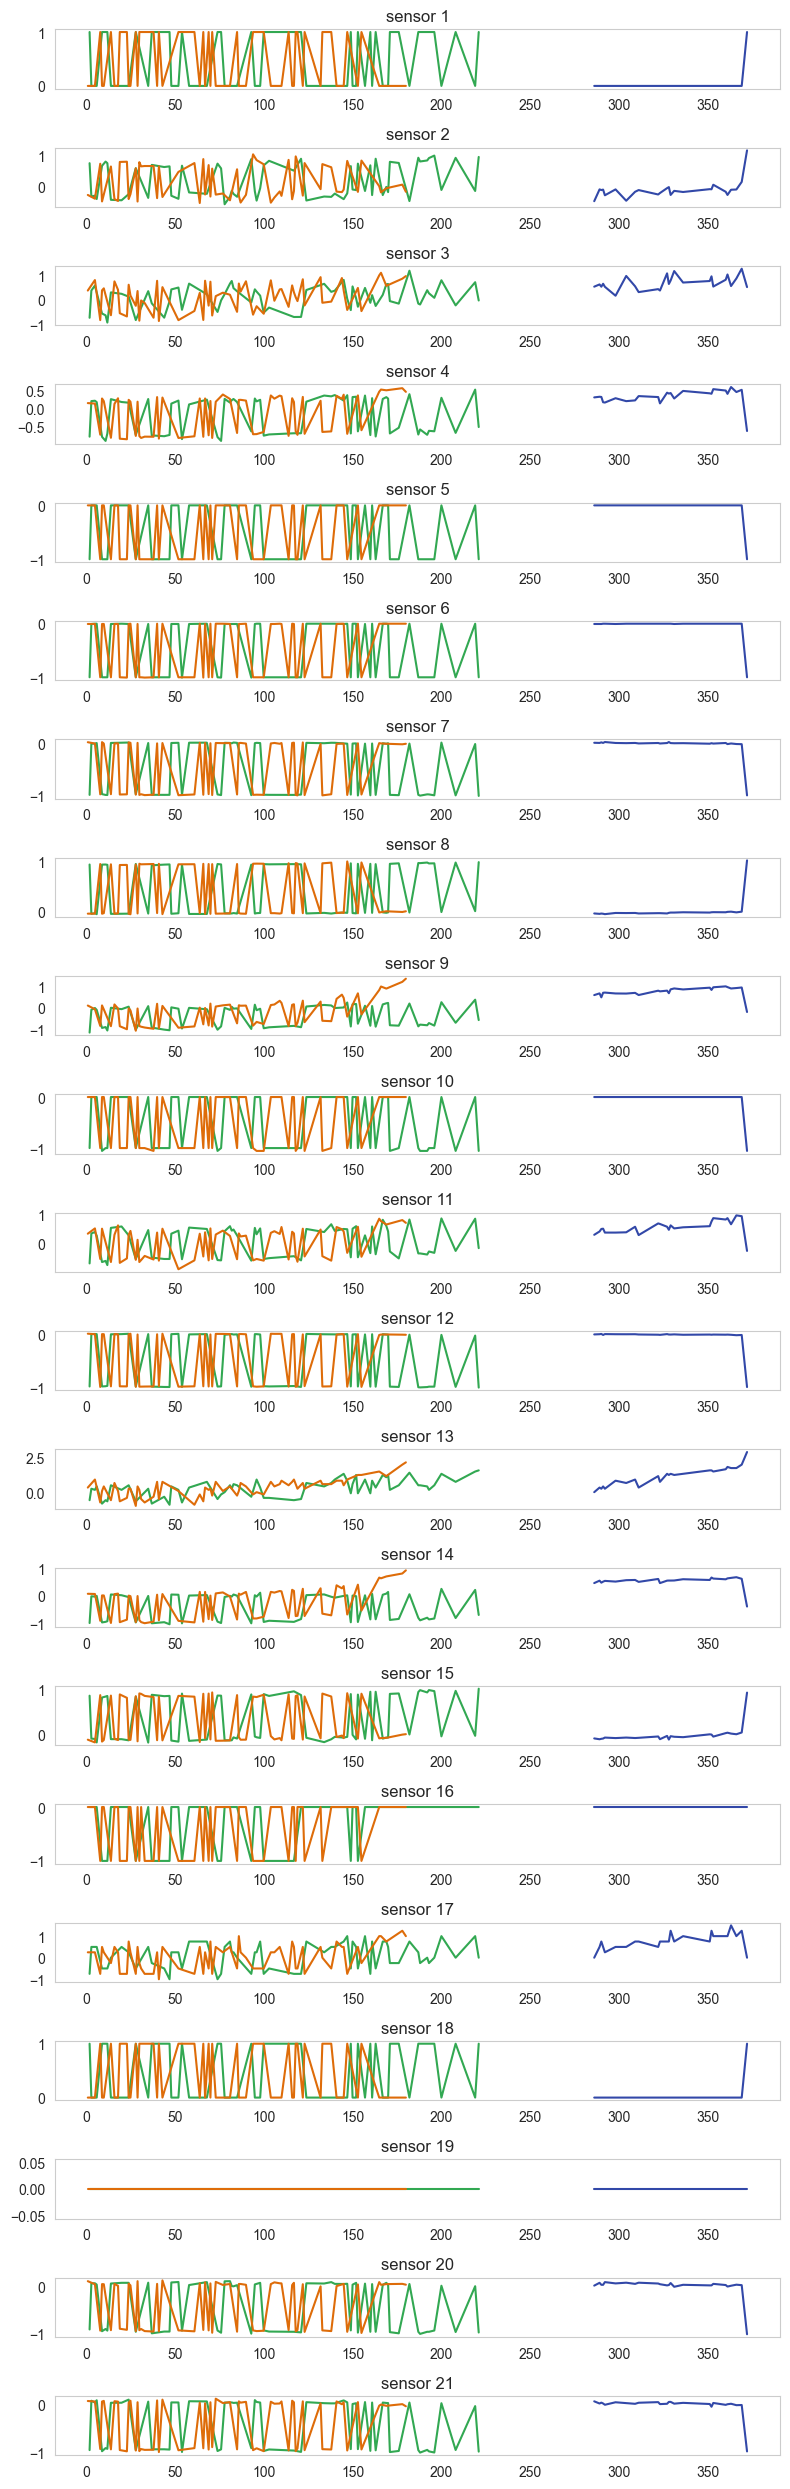

In [26]:
df = train_setting[1]
fig,axs = plt.subplots(nrows=21,ncols=1,figsize=(8,25))
random_id = np.random.randint(1,260,3)
df_id = df[df['id'].isin(random_id)]
colors = ['#32a852','#de6c09','#3248a8']
for i in range(21):
    for j,id_ in enumerate(random_id):
        color = colors[j % 3]
        df_sensor = df_id[df_id['id']==id_].iloc[:,[1,i+5]]
        df_sensor.set_index('time',inplace=True)
        axs[i].plot(df_sensor,color=color)
    axs[i].set_title(f'sensor {i+1}')
plt.tight_layout()


# Get the Slope

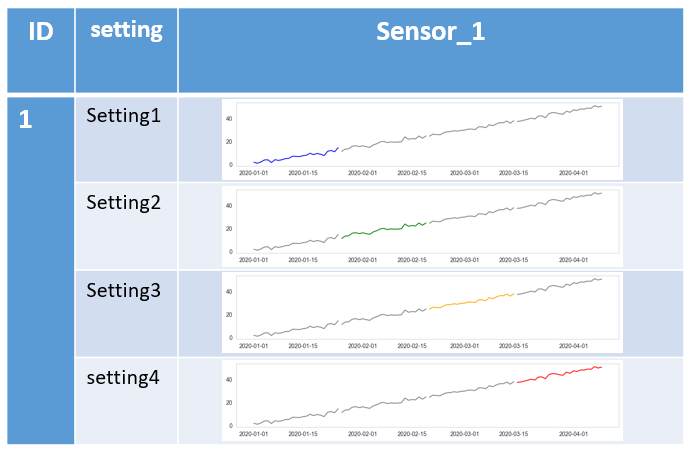

👉 Việc chia các setting khác nhau sẽ phân 1 id ra thành nhiểu khúc khác nhau

👉 Khi apply 1 simple linear vào thu được **y = ax+b** với a là hệ số góc(thể hiện trend), b là điểm cắt

👉 Tính trung bình của mỗi khúc ta vẫn thu được các **trend (hệ số a)** thể hiện **trend của toàn bộ 1 signal**, chỉ có b thay đổi (nhưng không quan tâm)

## By each setting, id

In [60]:
trend_sensor = np.zeros(21)
for sensor_idx in tqdm(range(5,21+5)):
    df =  train_df.iloc[:,[0,1,sensor_idx,-1]]
    slope_by_id = []
    for idx in range(1,261):
        df_id = df[df['id']==idx]
        slope_by_setting = []
        for setting_idx in df_id.Cluster_setting.unique():
            df_setting = df_id[df_id['Cluster_setting']==setting_idx]
            slope, intercept = np.linalg.lstsq(df_setting.iloc[:,1:-1], df_setting.iloc[:,2], rcond=None)[0]
            slope_by_setting.append(slope)
        mean_slope_by_setting = np.mean(slope_by_setting)
        slope_by_id.append(mean_slope_by_setting)
    mean_slope_by_id = np.mean(slope_by_id)
    trend_sensor[sensor_idx-5] = mean_slope_by_id

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:23<00:00,  1.13s/it]


In [75]:
trend_sensor_df = pd.DataFrame(trend_sensor)
trend_sensor_df.sort_values(by=0,ascending=False).head()

,0
9,0.000268
14,0.000133
4,0.000131
5,0.000092
20,0.000085


❌ Việc tính mean sẽ bị sai do các setting không đều nhau

## By each id

### Robust scaled

In [211]:
trend_sensor = np.zeros(21)
for sensor_idx in tqdm(range(5,21+5)):
    df =  train_setting_robust_scaled_df.iloc[:,[0,1,sensor_idx,-1]]
    slope_by_id = []
    for idx in range(1,261):
        df_id = df[df['id']==idx]
        df_id = df_id.sort_values(by='time')
        reg = LinearRegression().fit(df_id['time'].values.reshape(-1, 1), df_id.iloc[:,2])
        slope_by_id.append(reg.coef_)
    mean_slope_by_id = np.mean(slope_by_id)
    trend_sensor[sensor_idx-5] = mean_slope_by_id

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:08<00:00,  2.40it/s]


In [227]:
trend_sensor_df = pd.DataFrame(abs(trend_sensor))
trend_sensor_df.sort_values(by=0,ascending=False).head(10)

,0
12,0.005867
10,0.005330
3,0.004621
14,0.004515
2,0.003851
16,0.003624
8,0.002881
1,0.002857
13,0.002446
11,0.002335


### Minmax scaled

In [228]:
trend_sensor = np.zeros(21)
for sensor_idx in tqdm(range(5,21+5)):
    df =  train_setting_minmax_scaled_df.iloc[:,[0,1,sensor_idx,-1]]
    slope_by_id = []
    for idx in range(1,261):
        df_id = df[df['id']==idx]
        df_id = df_id.sort_values(by='time')
        reg = LinearRegression().fit(df_id['time'].values.reshape(-1, 1), df_id.iloc[:,2])
        slope_by_id.append(reg.coef_)
    mean_slope_by_id = np.mean(slope_by_id)
    trend_sensor[sensor_idx-5] = mean_slope_by_id

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:08<00:00,  2.48it/s]


In [230]:
trend_sensor_df = pd.DataFrame(abs(trend_sensor))
trend_sensor_df.sort_values(by=0,ascending=False).head(10)

,0
10,0.001583
3,0.001166
14,0.001031
16,0.001019
2,0.000872
1,0.000807
15,0.000642
19,0.000508
11,0.000479
12,0.000456


## Check

In [232]:
best_slop_sensor = np.array([1,2,3,10,11,12,14,16])
best_slop_sensor = best_slop_sensor+1
best_slop_sensor

array([ 2,  3,  4, 11, 12, 13, 15, 17])

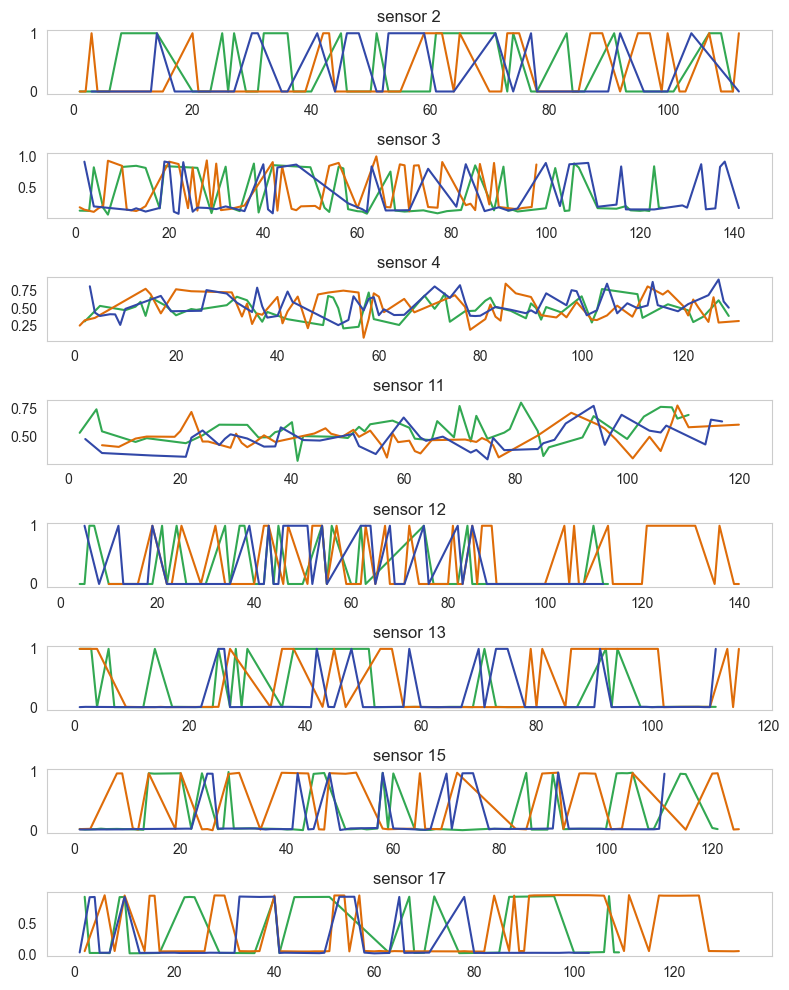

In [234]:
df = train_setting[0]
ids = df.id.unique()
fig,axs = plt.subplots(nrows=len(best_slop_sensor),ncols=1,figsize=(8,10))
colors = ['#32a852','#de6c09','#3248a8']
for i,idx in enumerate(best_slop_sensor):
    for j in range(3):
        id_ = random.choice(ids)
        color = colors[j % 3]
        df_sensor = df[df['id']==id_].iloc[:,[1,i+5]]
        df_sensor.set_index('time',inplace=True)
        axs[i].plot(df_sensor,color=color)
    axs[i].set_title(f'sensor {idx}')
plt.tight_layout()


👉3,4,11

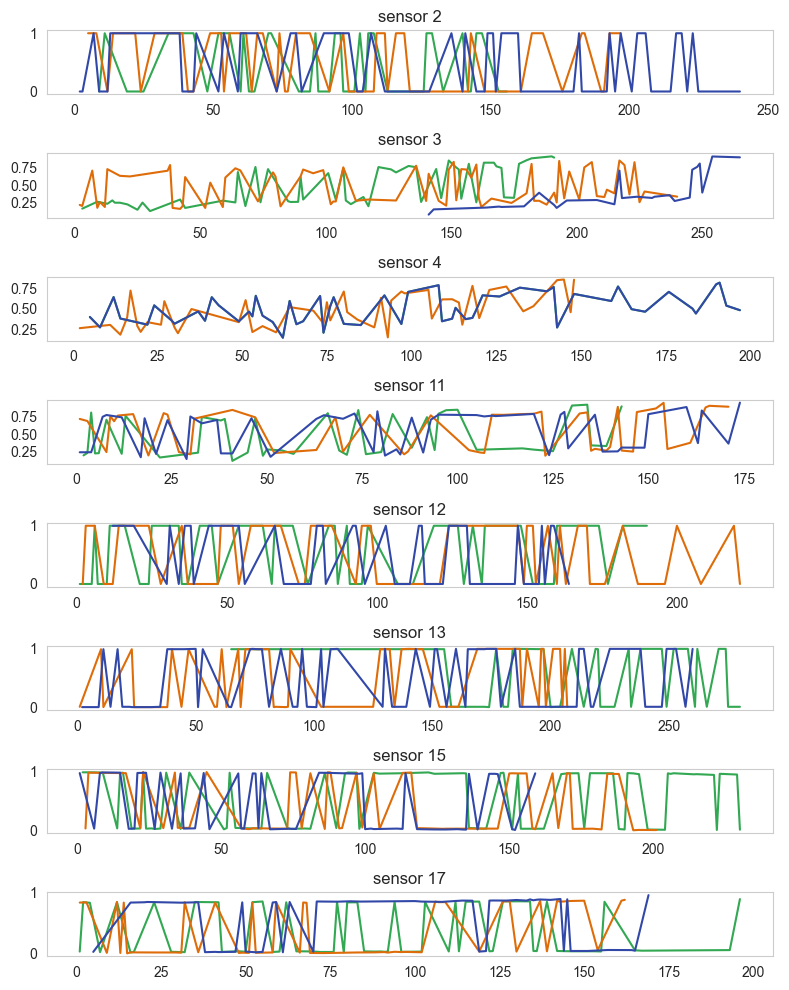

In [235]:
df = train_setting[1]
ids = df.id.unique()
fig,axs = plt.subplots(nrows=len(best_slop_sensor),ncols=1,figsize=(8,10))
colors = ['#32a852','#de6c09','#3248a8']
for i,idx in enumerate(best_slop_sensor):
    for j in range(3):
        id_ = random.choice(ids)
        color = colors[j % 3]
        df_sensor = df[df['id']==id_].iloc[:,[1,i+5]]
        df_sensor.set_index('time',inplace=True)
        axs[i].plot(df_sensor,color=color)
    axs[i].set_title(f'sensor {idx}')
plt.tight_layout()


👉3,4,11

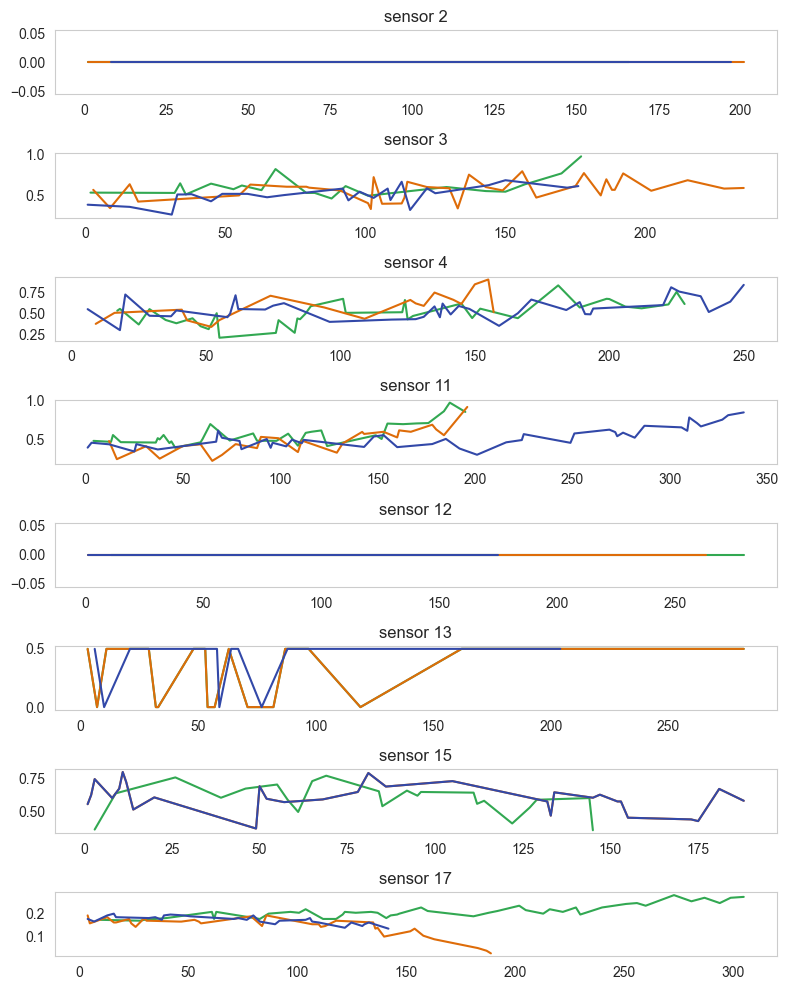

In [236]:
df = train_setting[2]
ids = df.id.unique()
fig,axs = plt.subplots(nrows=len(best_slop_sensor),ncols=1,figsize=(8,10))
colors = ['#32a852','#de6c09','#3248a8']
for i,idx in enumerate(best_slop_sensor):
    for j in range(3):
        id_ = random.choice(ids)
        color = colors[j % 3]
        df_sensor = df[df['id']==id_].iloc[:,[1,i+5]]
        df_sensor.set_index('time',inplace=True)
        axs[i].plot(df_sensor,color=color)
    axs[i].set_title(f'sensor {idx}')
plt.tight_layout()


👉3,4,11,17

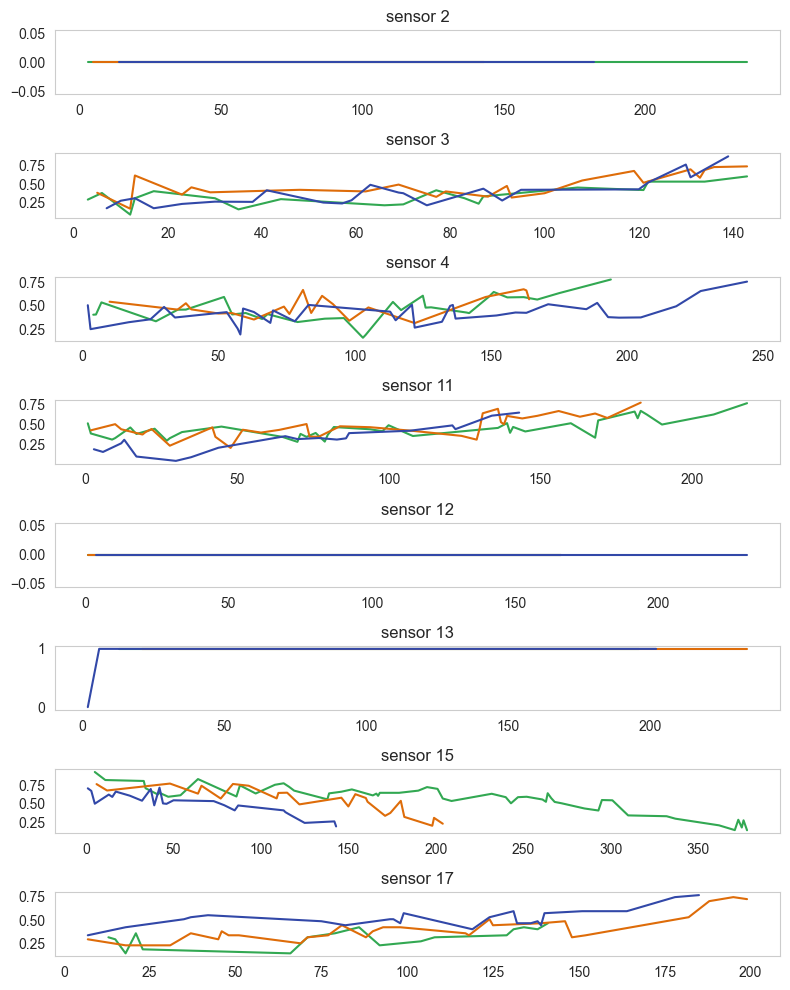

In [237]:
df = train_setting[3]
ids = df.id.unique()
fig,axs = plt.subplots(nrows=len(best_slop_sensor),ncols=1,figsize=(8,10))
colors = ['#32a852','#de6c09','#3248a8']
for i,idx in enumerate(best_slop_sensor):
    for j in range(3):
        id_ = random.choice(ids)
        color = colors[j % 3]
        df_sensor = df[df['id']==id_].iloc[:,[1,i+5]]
        df_sensor.set_index('time',inplace=True)
        axs[i].plot(df_sensor,color=color)
    axs[i].set_title(f'sensor {idx}')
plt.tight_layout()


👉3,4,11,15,17

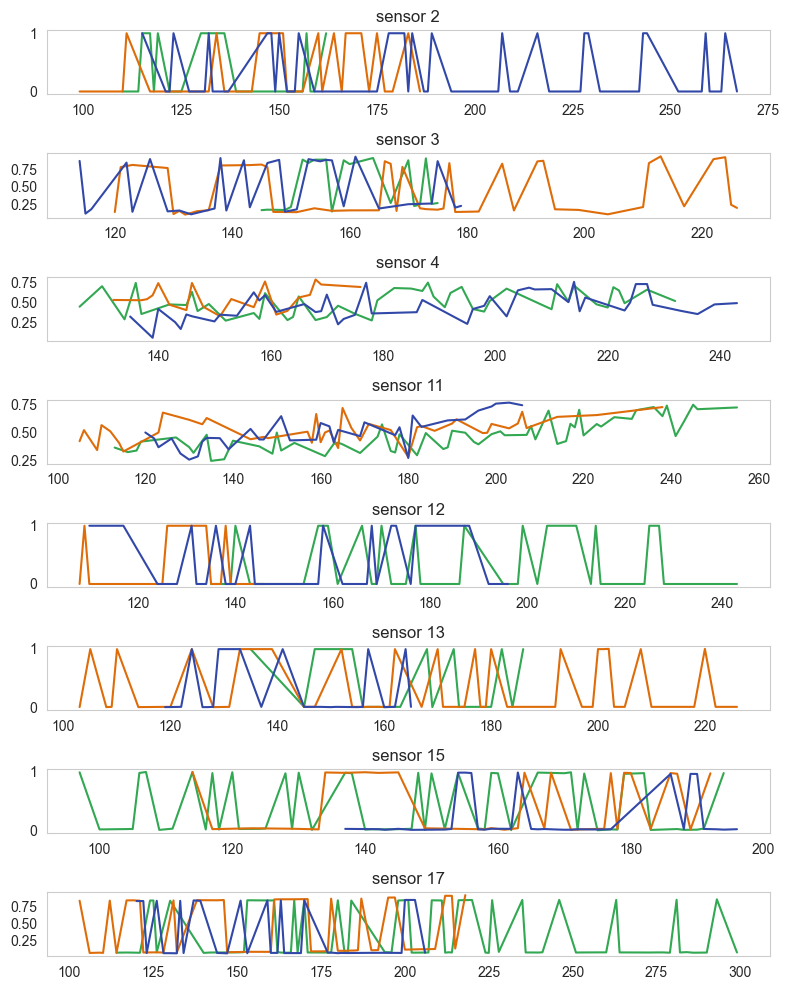

In [238]:
df = train_setting[4]
ids = df.id.unique()
fig,axs = plt.subplots(nrows=len(best_slop_sensor),ncols=1,figsize=(8,10))
colors = ['#32a852','#de6c09','#3248a8']
for i,idx in enumerate(best_slop_sensor):
    for j in range(3):
        id_ = random.choice(ids)
        color = colors[j % 3]
        df_sensor = df[df['id']==id_].iloc[:,[1,i+5]]
        df_sensor.set_index('time',inplace=True)
        axs[i].plot(df_sensor,color=color)
    axs[i].set_title(f'sensor {idx}')
plt.tight_layout()


👉3,4,11

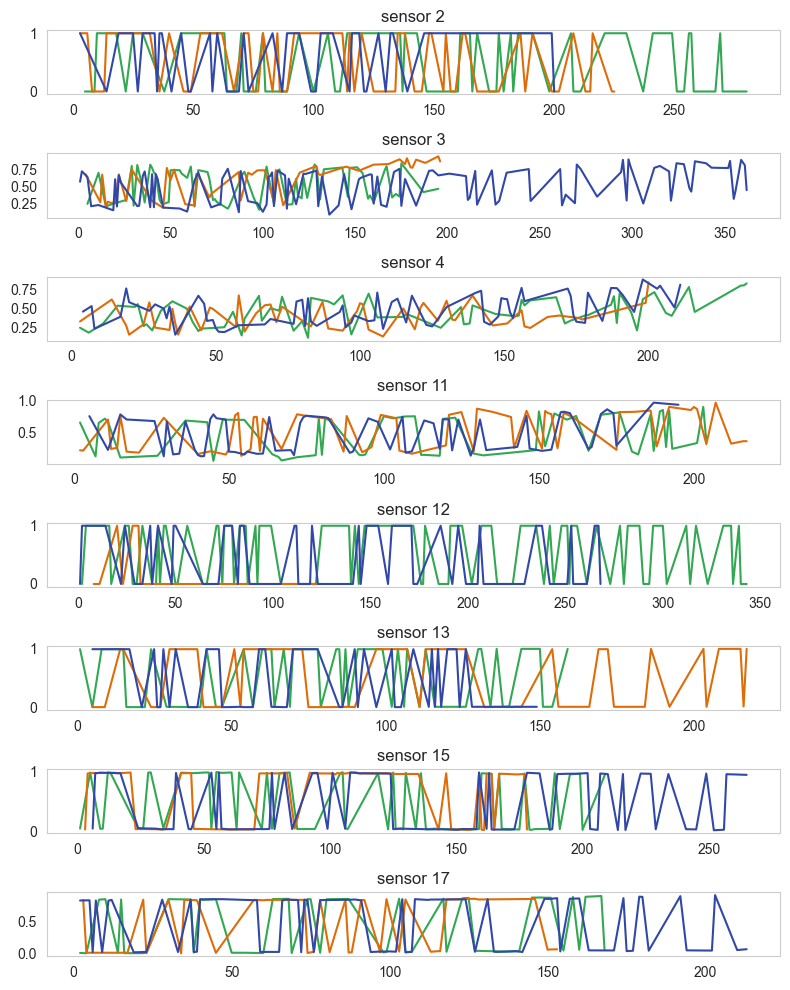

In [239]:
df = train_setting[5]
ids = df.id.unique()
fig,axs = plt.subplots(nrows=len(best_slop_sensor),ncols=1,figsize=(8,10))
colors = ['#32a852','#de6c09','#3248a8']
for i,idx in enumerate(best_slop_sensor):
    for j in range(3):
        id_ = random.choice(ids)
        color = colors[j % 3]
        df_sensor = df[df['id']==id_].iloc[:,[1,i+5]]
        df_sensor.set_index('time',inplace=True)
        axs[i].plot(df_sensor,color=color)
    axs[i].set_title(f'sensor {idx}')
plt.tight_layout()


👉3,4,11

**CONCLUSION: Choosing 3,4,11**

<span style="color:red">&#10060;</span> : X

👉 👇


⚠️

<span style="color: green; font-size: 24px;">&#10004;</span>
: Dấu tích

&#128161; : bóng đèn

<font size =5> &#x1F9EE; Công thức 

<font size =5> &#x1F4DA; : Bài tập
   
<img src='link' style="width:500px;"/> : Chèn ảnh
    
<div style="margin-left: 200px;">: căn lề
    
    
<span style="color: color;"> **text**</span> : màu